## All Models All Runs Visualisation

This notebook creates code to visualise and compare the results of all model families across all runs. 

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Define the base path for results
results_path = r"../../data/results"

# Get all run folders (should be folders named 1, 2, 3, etc.)
run_folders = [f for f in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, f))]
run_num = [f for f in run_folders if f.isdigit()]
run_num.sort(key=int)  # Sort numerically

print(f"Found runs: {run_num}")

# Dictionary to store data from each run
all_runs_data = {}

# Access data for each run
for run in run_num:
    run_path = os.path.join(results_path, run)
    print(f"Processing run {run} from: {run_path}")
    
    # Store the path for this run
    all_runs_data[run] = {
        'path': run_path,
        'files': os.listdir(run_path)
    }
    
    print(f"  Files in run {run}: {all_runs_data[run]['files']}")

Found runs: ['1', '2', '3']
Processing run 1 from: ../../data/results/1
  Files in run 1: ['mistral_mm_local', 'llama_mm_local', 'qwen_mm_local', 'openai', 'gemma_mm_local']
Processing run 2 from: ../../data/results/2
  Files in run 2: ['openai', 'llama_mm_local', 'qwen_mm_local', 'gemma_mm_local', 'mistral_mm_local']
Processing run 3 from: ../../data/results/3
  Files in run 3: ['mistral_mm_local', 'llama_mm_local', 'qwen_mm_local', 'openai', 'gemma_mm_local']


In [3]:
# Within each run, there are multiple folders for each model family. 
# Each folder contains a CSV file with the results we need for the visualisation, named "clean_questions_traits_evaluation.csv"
# We need to extract the data from these CSV files and prepare it for visualisation. The relevant columns are:
# - 'prompt_id'
# - 'model_id'
# - 'accuracy'
# We need to create a boxplot with models on the x-axis and accuracy on the y-axis, coloured by the model family.

In [3]:
# Collect all data from CSV files across all runs
all_data = []

for run in run_num:
    run_path = all_runs_data[run]['path']
    
    # Get all model family folders in this run
    model_folders = [f for f in os.listdir(run_path) if os.path.isdir(os.path.join(run_path, f))]
    
    for model_family in model_folders:
        model_path = os.path.join(run_path, model_family)
        csv_file = os.path.join(model_path, "questions_traits_evaluation.csv")
        
        # Check if the CSV file exists
        if os.path.exists(csv_file):
            # Read the CSV file
            df = pd.read_csv(csv_file)
            
            # Add run and model family information
            df['run'] = run
            df['model_family'] = model_family
            
            # Select only the columns we need
            df_subset = df[['prompt_id', 'model_id', 'accuracy', 'run', 'model_family']]
            
            all_data.append(df_subset)
            print(f"Loaded data from run {run}, model family {model_family}: {len(df)} rows")

# Combine all data into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)
print(f"\nTotal combined data: {len(combined_df)} rows")
print(f"Model families found: {combined_df['model_family'].unique()}")
print(f"Unique models: {combined_df['model_id'].nunique()}")
print(f"df columns: {combined_df.columns.tolist()}")

Loaded data from run 1, model family mistral_mm_local: 100 rows
Loaded data from run 1, model family llama_mm_local: 300 rows
Loaded data from run 1, model family qwen_mm_local: 300 rows
Loaded data from run 1, model family openai: 300 rows
Loaded data from run 1, model family gemma_mm_local: 300 rows
Loaded data from run 2, model family openai: 300 rows
Loaded data from run 2, model family llama_mm_local: 300 rows
Loaded data from run 2, model family qwen_mm_local: 300 rows
Loaded data from run 2, model family gemma_mm_local: 300 rows
Loaded data from run 2, model family mistral_mm_local: 100 rows
Loaded data from run 3, model family mistral_mm_local: 100 rows
Loaded data from run 3, model family llama_mm_local: 300 rows
Loaded data from run 3, model family qwen_mm_local: 300 rows
Loaded data from run 3, model family openai: 300 rows
Loaded data from run 3, model family gemma_mm_local: 300 rows

Total combined data: 3900 rows
Model families found: ['mistral_mm_local' 'llama_mm_local' 

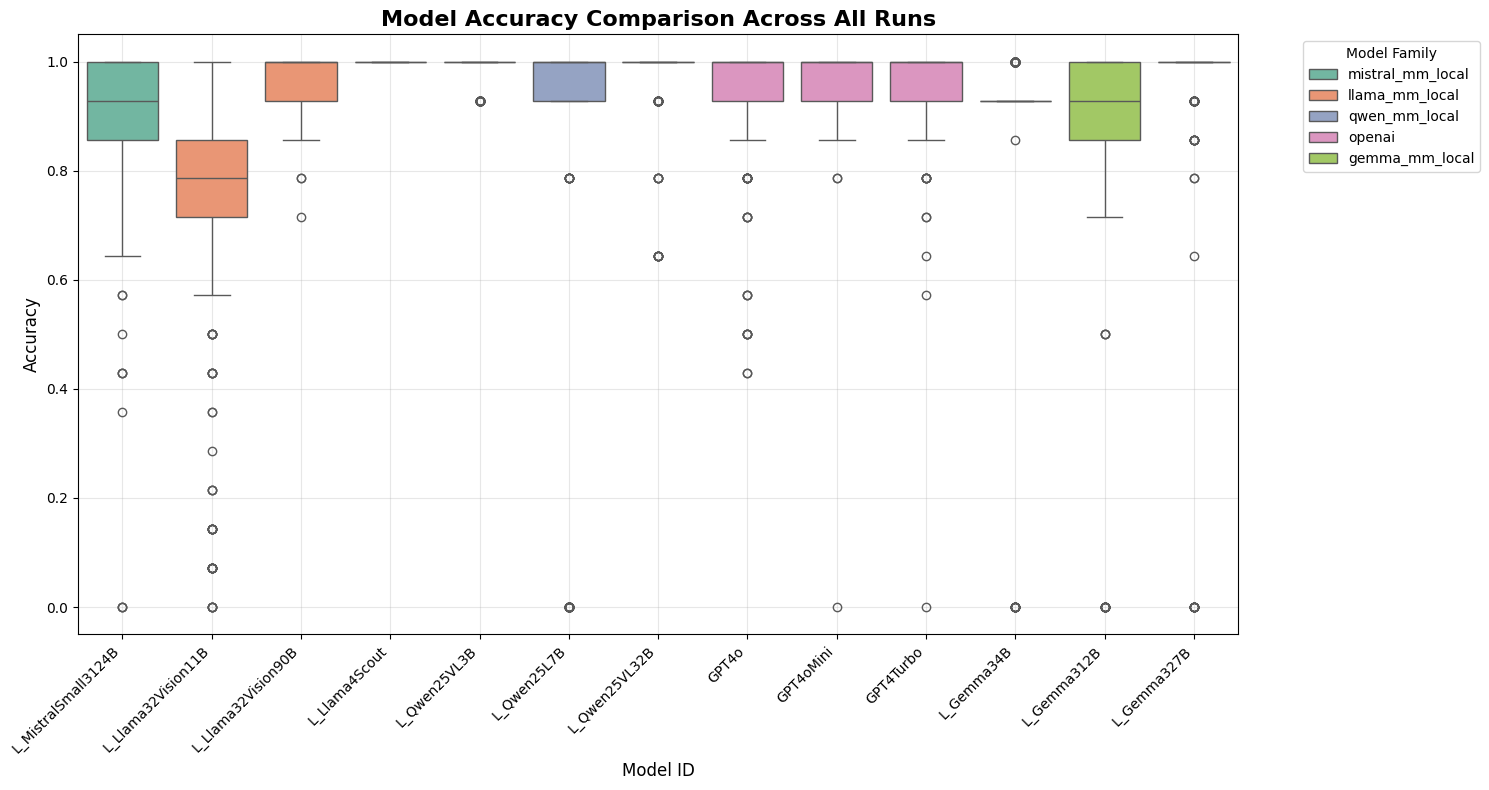


Summary Statistics by Model Family:
                  count      mean       std  min       25%       50%  75%  max
model_family                                                                  
gemma_mm_local    900.0  0.906746  0.217022  0.0  0.928571  1.000000  1.0  1.0
llama_mm_local    900.0  0.897778  0.183956  0.0  0.857143  1.000000  1.0  1.0
mistral_mm_local  300.0  0.895952  0.142165  0.0  0.857143  0.928571  1.0  1.0
openai            900.0  0.959524  0.086388  0.0  0.928571  1.000000  1.0  1.0
qwen_mm_local     900.0  0.942698  0.195735  0.0  1.000000  1.000000  1.0  1.0


In [4]:
# Create a boxplot with models on x-axis and accuracy on y-axis, colored by model family
# make sure that the accuracy is aggregated correctly over runs and models.
plt.figure(figsize=(15, 8))

# Create the boxplot
sns.boxplot(data=combined_df, x='model_id', y='accuracy', hue='model_family', palette='Set2')

# Customize the plot
plt.title('Model Accuracy Comparison Across All Runs', fontsize=16, fontweight='bold')
plt.xlabel('Model ID', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model Family', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics
print("\nSummary Statistics by Model Family:")
print(combined_df.groupby('model_family')['accuracy'].describe())

In [5]:
# Avg accuracy per model across all runs
avg_accuracy_df = combined_df.groupby(["model_id", "model_family"])["accuracy"].mean().reset_index()
avg_accuracy_df = avg_accuracy_df.sort_values(by="accuracy", ascending=False)

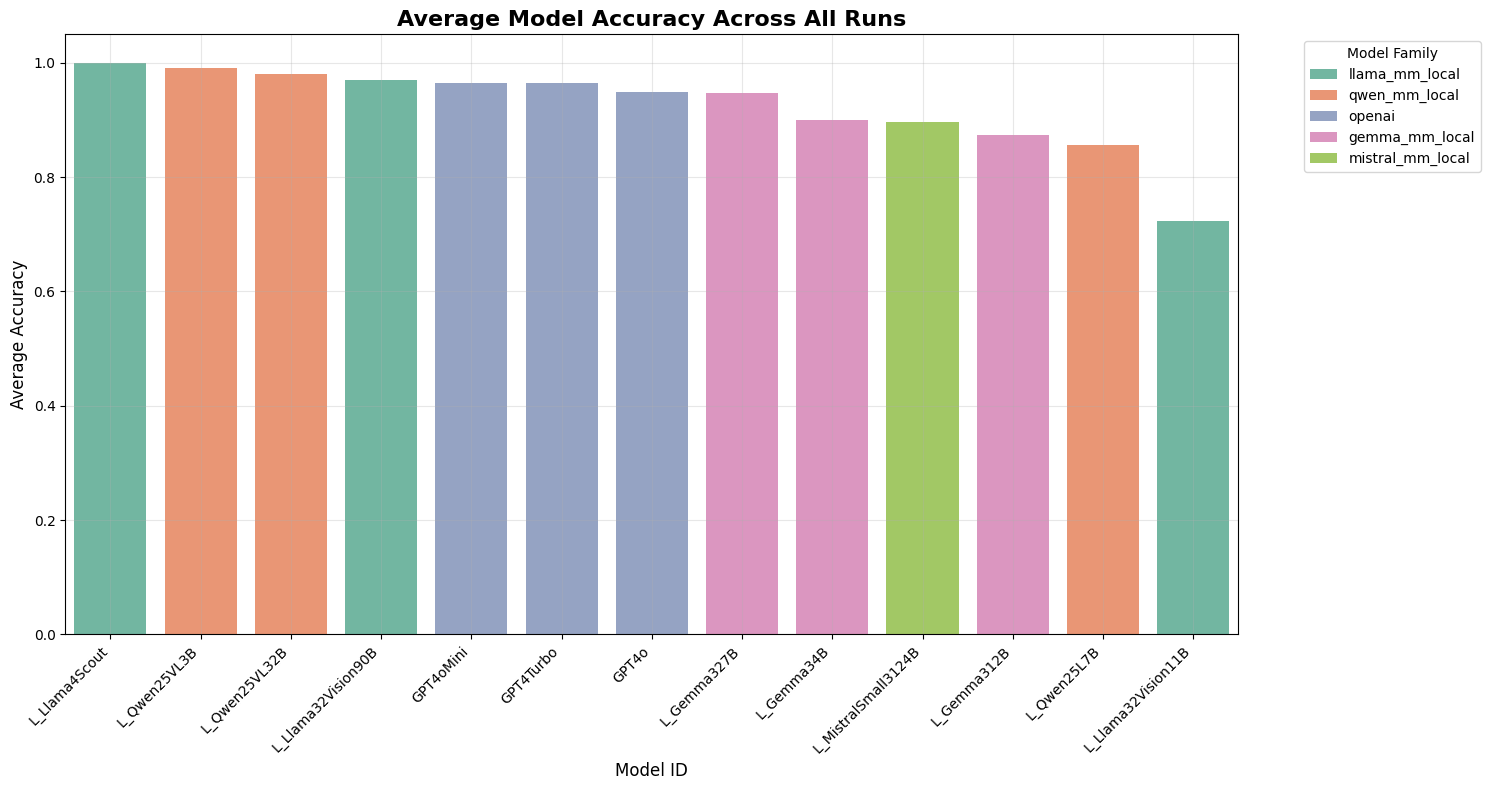

In [6]:
plt.figure(figsize=(15, 8))
sns.barplot(data=avg_accuracy_df, x='model_id',
            y='accuracy', palette='Set2', hue='model_family')

plt.title('Average Model Accuracy Across All Runs', fontsize=16, fontweight='bold')
plt.xlabel('Model ID', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model Family', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show();